In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.9 MB/s 
     |████████████████████████████████| 101 kB 12.6 MB/s 
     |████████████████████████████████| 6.6 MB 46.8 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from tqdm import tqdm
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/"

In [ ]:
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!kaggle competitions download -c tweet-sentiment-extraction

tweet-sentiment-extraction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

 dogs-vs-cats.zip
 kaggle.json
 movie-review-sentiment-analysis-kernels-only.zip
'sample_submission (1).csv'
 sampleSubmission.csv
 Sentiment.csv
 test1/
 test1.zip
 testnew.csv
 test_p2.csv
 train/
 trainnew.csv
 train_p2.csv.zip
 train.zip
 TrkceTwitter.csv
 tweet-sentiment-extraction.zip
 tweetssentimentanalysis2019.zip


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Kaggle/train_p2.csv.zip")
df_test = pd.read_csv("/content/drive/MyDrive/Kaggle/test_p2.csv")

In [ ]:
df_train.shape

(27481, 4)

In [ ]:
df_train.info

<bound method DataFrame.info of            textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have resp

In [ ]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

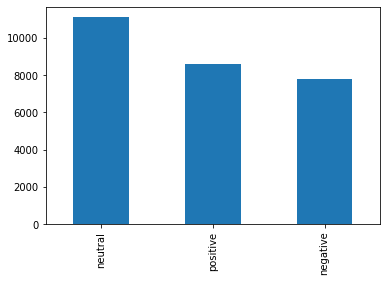

In [ ]:
df_train['sentiment'].value_counts().plot.bar()

In [ ]:
df_train.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
df_train['Num_of_words_text'] = df_train['text'].apply(lambda x : len(str(x).split()))
df_train['Num_of_words_ST'] = df_train['selected_text'].apply(lambda x : len(str(x).split()))
df_train['Difference'] = df_train['Num_of_words_text'] - df_train['Num_of_words_ST']
df_train.head()

,textID,text,selected_text,sentiment,Num_of_words_text,Num_of_words_ST,Difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11


In [ ]:
def jaccard_similarity(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)/(len(a)+len(b)-len(c)))

In [ ]:
jaccard_sim = []
for index, rows in df_train.iterrows():
    st1 = rows.text
    st2 = rows.selected_text
    jaccard_sim.append([st1, st2, jaccard_similarity(st1,st2)])

df_jaccard = pd.DataFrame(jaccard_sim, columns = ['text','selected_text', 'jaccard_similarity'])
df_train = df_train.merge(df_jaccard, how='left')
df_train.head()

,textID,text,selected_text,sentiment,Num_of_words_text,Num_of_words_ST,Difference,jaccard_similarity
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11,0.214286


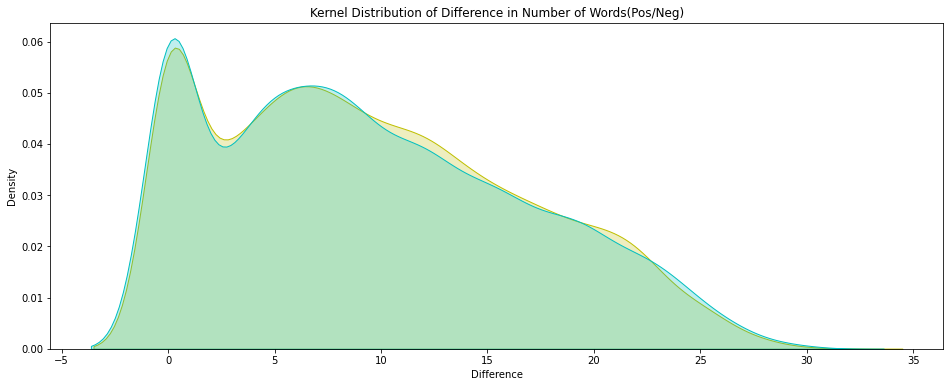

In [ ]:
plt.figure(figsize=(16,6))
p1 = sns.kdeplot(df_train[df_train['sentiment']=='positive']['Difference'], shade=True, color='y').set_title("Kernel Distribution of Difference in Number of Words(Pos/Neg)")
p2 = sns.kdeplot(df_train[df_train['sentiment']=='negative']['Difference'], shade=True, color='c')

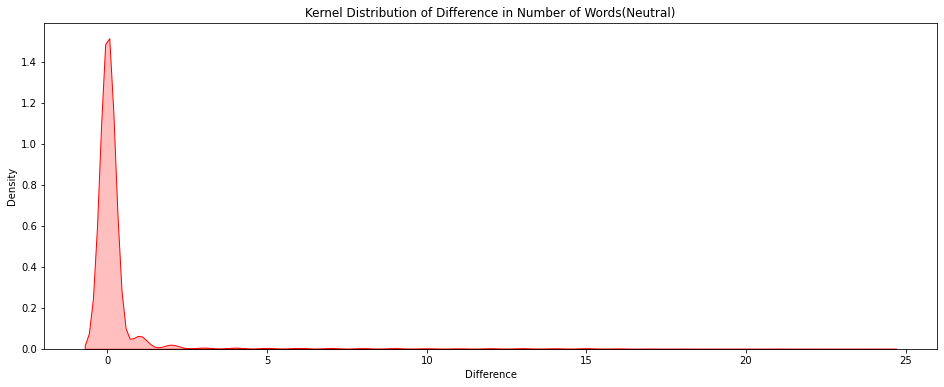

In [ ]:
plt.figure(figsize=(16,6))
p3 = sns.kdeplot(df_train[df_train['sentiment']=='neutral']['Difference'], shade=True, color='r').set_title("Kernel Distribution of Difference in Number of Words(Neutral)")

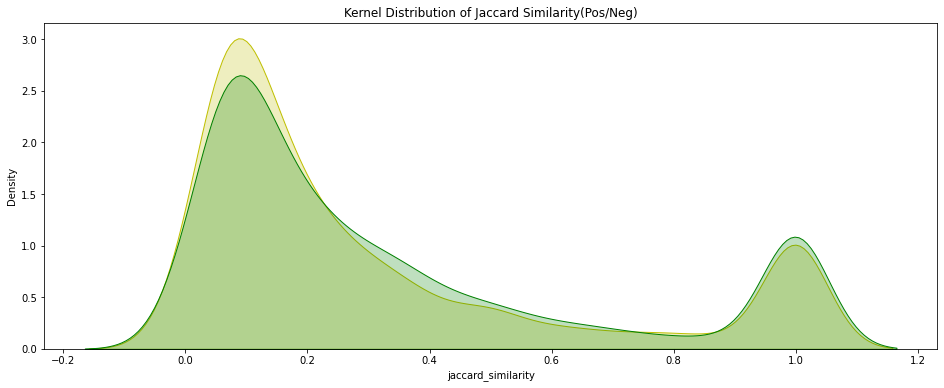

In [ ]:
plt.figure(figsize=(16,6))
p1 = sns.kdeplot(df_train[df_train['sentiment']=='positive']['jaccard_similarity'], shade=True, color='y').set_title("Kernel Distribution of Jaccard Similarity(Pos/Neg)")
p2 = sns.kdeplot(df_train[df_train['sentiment']=='negative']['jaccard_similarity'], shade=True, color='g')

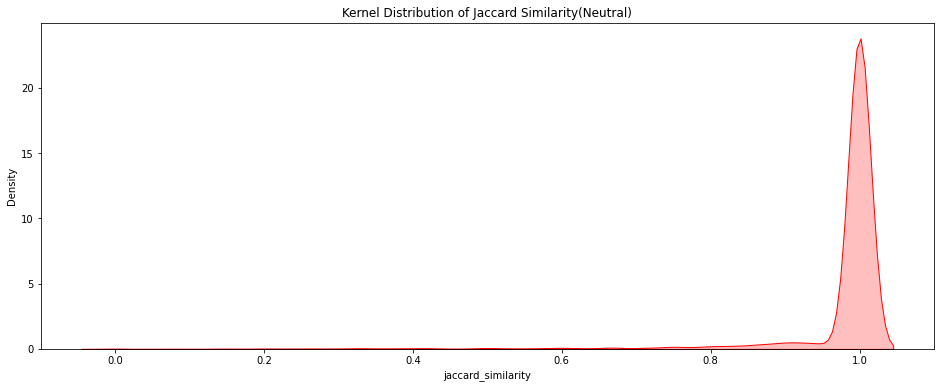

In [ ]:
plt.figure(figsize=(16,6))
p1 = sns.kdeplot(df_train[df_train['sentiment']=='neutral']['jaccard_similarity'], shade=True, color='r').set_title("Kernel Distribution of Jaccard Similarity(Neutral)")

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('http?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_train['text'] = df_train['text'].apply(lambda x : clean_text(x))
df_train['selected_text'] = df_train['selected_text'].apply(lambda x : clean_text(x))
df_train.head(10)

,textID,text,selected_text,sentiment,Num_of_words_text,Num_of_words_ST,Difference,jaccard_similarity
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,1.000000
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,10,2,8,0.200000
2,088c60f138,my boss is bullying me,bullying me,negative,5,2,3,0.166667
3,9642c003ef,what interview leave me alone,leave me alone,negative,5,3,2,0.600000
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,14,3,11,0.214286
5,28b57f3990,some shameless plugging for the best rangers...,some shameless plugging for the best rangers...,neutral,12,12,0,1.000000
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive,14,1,13,0.071429
7,50e14c0bb8,soooo high,soooo high,neutral,2,2,0,1.000000
8,e050245fbd,both of you,both of you,neutral,3,3,0,1.000000
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive,10,5,5,0.500000


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_train['st_list'] = df_train['selected_text'].apply(lambda x : str(x).split())
df_train['text_list'] = df_train['text'].apply(lambda x : str(x).split())

def remove_stopwords(x):
    return [y for y in x if y not in stopwords.words('english')]

df_train['st_list'] = df_train['st_list'].apply(lambda x : remove_stopwords(x))
df_train['text_list'] = df_train['text_list'].apply(lambda x : remove_stopwords(x))
df_train.head()

,textID,text,selected_text,sentiment,Num_of_words_text,Num_of_words_ST,Difference,jaccard_similarity,st_list,text_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,1.000000,"[id, responded, going]","[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,10,2,8,0.200000,"[sooo, sad]","[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,bullying me,negative,5,2,3,0.166667,[bullying],"[boss, bullying]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,5,3,2,0.600000,"[leave, alone]","[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,14,3,11,0.214286,[sons],"[sons, couldnt, put, releases, already, bought]"


In [ ]:
'''most common words in positive sentiment selected text'''
top = Counter([item for sublist in df_train[df_train['sentiment']=='positive']['st_list'] for item in sublist])
top_pos = pd.DataFrame(top.most_common(20), columns=['Common Words', 'Count'])
top_pos.style.background_gradient(cmap='Greens')

,Common Words,Count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [ ]:
'''most common words in negative sentiment selected text'''
top = Counter([item for sublist in df_train[df_train['sentiment']=='negative']['st_list'] for item in sublist])
top_neg = pd.DataFrame(top.most_common(20), columns=['Common Words', 'Count'])
top_neg.style.background_gradient(cmap='Oranges')

,Common Words,Count
0,im,452
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162


In [ ]:
'''most common words in neutral sentiment selected text'''
top = Counter([item for sublist in df_train[df_train['sentiment']=='neutral']['st_list'] for item in sublist])
top_neu = pd.DataFrame(top.most_common(20), columns=['Common Words', 'Count'])
top_neu.style.background_gradient(cmap='Blues')

,Common Words,Count
0,im,1039
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427


In [ ]:
def unique_words(sentiment, num):
    all_other = []
    for sublist in df_train[df_train['sentiment']!=sentiment]['st_list']:
        for word in sublist:
            all_other.append(word)
    unique = Counter([word for sublist in df_train[df_train['sentiment']==sentiment]['st_list'] for word in sublist if word not in all_other])
    return pd.DataFrame(unique.most_common(num), columns=['Words','Count'])

In [ ]:
unique_pos = unique_words('positive',20)
print("20 unique postive words:")
unique_pos.style.background_gradient(cmap='Greens')

20 unique postive words:


,Words,Count
0,congratulations,26
1,thnx,8
2,lov,8
3,happ,7
4,talented,7
5,brilliant,7
6,appreciated,6
7,goood,6
8,amazin,5
9,mommas,5


In [ ]:
unique_neg = unique_words('negative',20)
print("20 unique negative words:")
unique_neg.style.background_gradient(cmap='Oranges')

20 unique negative words:


,Words,Count
0,ache,10
1,saddest,7
2,hated,6
3,weak,6
4,suffering,6
5,rly,5
6,devastated,5
7,pissing,5
8,allergic,4
9,cramps,4


In [ ]:
unique_neu = unique_words('neutral',20)
print("20 unique neutral words:")
unique_neu.style.background_gradient(cmap='Blues')

20 unique neutral words:


,Words,Count
0,hows,33
1,store,28
2,guitar,26
3,green,22
4,catching,16
5,myspace,16
6,planning,15
7,random,15
8,hrs,15
9,shop,15


In [ ]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u','im'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color = 'white',
                          stopwords = stopwords,
                          max_words = 50,
                          max_font_size = 40)
    wordcloud.generate(str(text))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

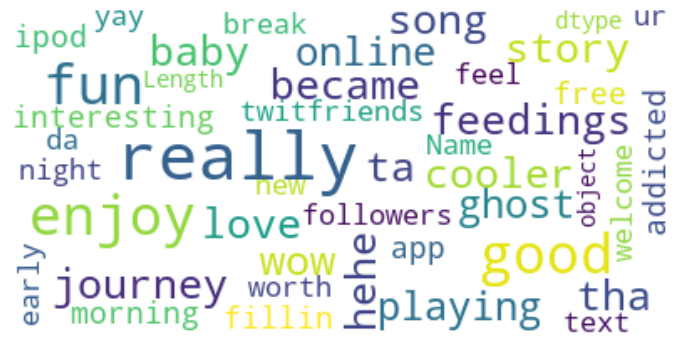

In [ ]:
create_wordcloud(df_train[df_train['sentiment']=='positive']['text'])

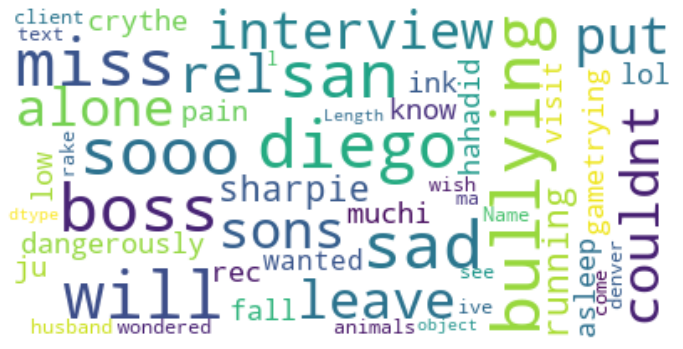

In [ ]:
create_wordcloud(df_train[df_train['sentiment']=='negative']['text'])

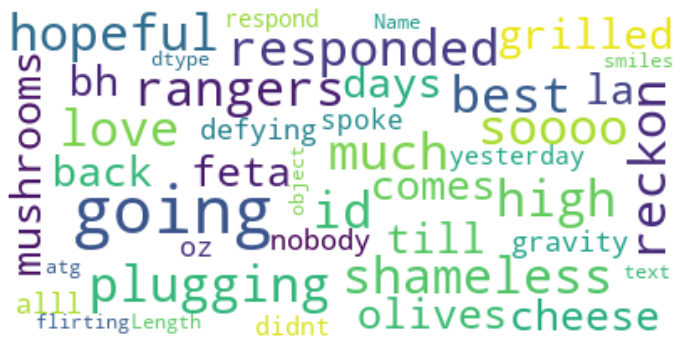

In [ ]:
create_wordcloud(df_train[df_train['sentiment']=='neutral']['text'])

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Kaggle/train_p2.csv.zip')
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/test_p2.csv')
df_train = df_train.dropna()

In [ ]:
'''return train data in a format needed for spacy NER'''

def get_training_data(sentiment):
    train_data = []
    for index, row in df_train.iterrows():
        text = row.text
        selected_text = row.selected_text
        start = text.find(selected_text)
        end = start + len(selected_text)
        train_data.append((text, {"entities":[[start, end, 'selected_text']]}))
    return train_data

In [ ]:
'''return model output path'''

def get_model_out_path(sentiment):
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path

In [ ]:
#Öncelikle kullanacağımız python kütüphanaelerini ekliyerek çalışmamıza başlıyoruz
import numpy as np #Bu kütüphane lineer cebir için kullandığımız kütüphane fonksiyonlarını içeriyor
import pandas as pd # verilerimizi işlemek için pandas kütüphanasini kullanıyoruz(örn pd.read_scv)
from sklearn.model_selection import train_test_split #Bu işlem ile verilerimizi eğitim ve test(%70-%30) olacak çekilde bölüyoruz

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output 

In [ ]:
# from spacy.language import Language
# Language.factory("ent_ruler", func=get_ent_ruler)
# nlp.add_pipe("ent_ruler", last=True)

In [ ]:
# from tqdm import tqdm
# from sklearn.feature_extraction.text import TfidfVectorizer
# from spacy.lang.en import English
# # import emoji
# import spacy
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.utils.validation import check_is_fitted
# from sklearn.model_selection import train_test_split
# from sklearn.exceptions import NotFittedError

# import re

# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwords = set(stopwords.words('english'))
# nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
import re
from spacy.language import Language

nlp = spacy.load('en_core_web_sm')
boundary = re.compile('^[0-9]$')

@Language.component("component")
def custom_seg(doc):
    prev = doc[0].text
    length = len(doc)
    for index, token in enumerate(doc):
        if (token.text == '.' and boundary.match(prev) and index!=(length - 1)):
            doc[index+1].sent_start = False
        prev = token.text
    return doc
    
nlp.add_pipe("component", before='parser')

<function __main__.custom_seg>

In [ ]:
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
    data (list): The data to be cleaned in spaCy JSON format.

    Returns:
    list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            # if there's preceding spaces, move the start position to nearest character
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data

In [ ]:
def train(train_data, output_dir, n_iter=20, model=None):
    train_data = trim_entity_spans(train_data)
    if model is not None:
        nlp = spacy.load(model)  
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.add_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
         ner = nlp.add_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        
        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            losses = {}
            for text, annotations in train_data:
                try:
                    nlp.update(
                        [text],  
                        [annotations],  
                        drop=0.2,  
                        sgd=optimizer,  
                        losses=losses)
                except Exception as error:
                    continue
            print(losses)
    save_model(output_dir, nlp, 'st_ner')

In [ ]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [ ]:
!python --version

Python 3.7.13


In [ ]:
from spacy.language import Language

@Language.component("my_component")
def my_component(doc):
    return doc

In [ ]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
train(train_data, model_path, n_iter=2, model=None)

Created blank 'en' model


ValueError: ignored

In [ ]:
# sentiment = 'negative'

# train_data = get_training_data(sentiment)
# model_path = get_model_out_path(sentiment)
# train(train_data, model_path, n_iter=2, model=None)

Created blank 'en' model


ValueError: ignored

In [ ]:
def predict_entities(text, model):
    doc = model(text)
    start=0
    end=0
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
    selected_text = text[start: end]
    return selected_text

In [ ]:
# selected_texts = []
# MODELS_BASE_PATH = 'models/'
# import spacy.cli
# spacy.cli.download("en_core_web_lg")

# if MODELS_BASE_PATH is not None:
#     print("Loading Models  from ", MODELS_BASE_PATH)
#     model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
#     model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
#     for index, row in df_test.iterrows():
#         text = row.text
#         output_str = ""
#         if row.sentiment == 'neutral' or len(text.split()) <= 2:
#             selected_texts.append(text)
#         elif row.sentiment == 'positive':
#             selected_texts.append(predict_entities(text, model_pos))
#         else:
#             selected_texts.append(predict_entities(text, model_neg))
        
# df_test['selected_text'] = selected_texts

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Loading Models  from  models/


OSError: ignored

In [ ]:
df_submission = pd.read_csv('/content/drive/MyDrive/Kaggle/testnew.csv')

In [ ]:
df_submission.shape

(3534, 3)

In [ ]:
df_test.shape

(3534, 3)

In [ ]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
# df_submission['selected_text'] = df_test['selected_text']
# df_submission.to_csv("submission.csv", index=False)
# display(df_submission.head(10))

In [ ]:
#ikinci denediğim kodlama kısmı

In [ ]:
#Öncelikle kullanacağımız python kütüphanaelerini ekliyerek çalışmamıza başlıyoruz
import numpy as np #Bu kütüphane lineer cebir için kullandığımız kütüphane fonksiyonlarını içeriyor
import pandas as pd # verilerimizi işlemek için pandas kütüphanasini kullanıyoruz(örn pd.read_scv)
from sklearn.model_selection import train_test_split #Bu işlem ile verilerimizi eğitim ve test(%70-%30) olacak çekilde bölüyoruz

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output 

In [ ]:
veri = pd.read_csv("/content/drive/MyDrive/Kaggle/train(1)newp2.csv")
veri = veri[['textID', 'text', 'sentiment']]

In [ ]:
#Veri Setimi Eğitim ve test verilerine ayırıyorum
train, test = train_test_split(veri, test_size = 0.1)
#Sonra Veri seti içerisindeki Nötr duyguları çıkarıyorum
train = train[train.sentiment !="Neutral"]

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Pozirif Kelimeler")
wordcloud_draw(train_pos,'white')
print("Negatif Kelimeler")
wordcloud_draw(train_neg)

Pozirif Kelimeler


ValueError: ignored

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweets =[]
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned, row.sentiment))
    
test_pos = test[test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[test['sentiment'] == 'Negative']
test_neg = test_neg['text']

AttributeError: ignored

In [ ]:
#Kelimelerin özelliklerini çıkarıyorum.
def get_words_in_tweets(tweets):
    all =[]
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

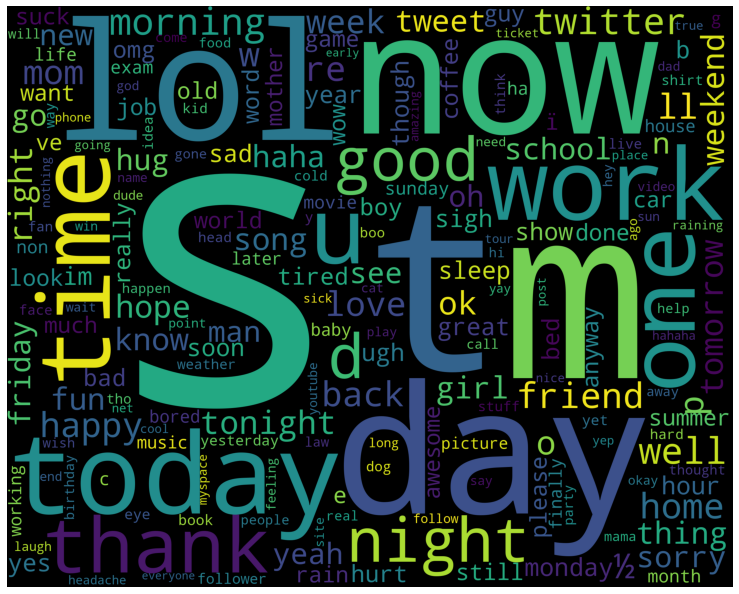

In [ ]:
wordcloud_draw(w_features)

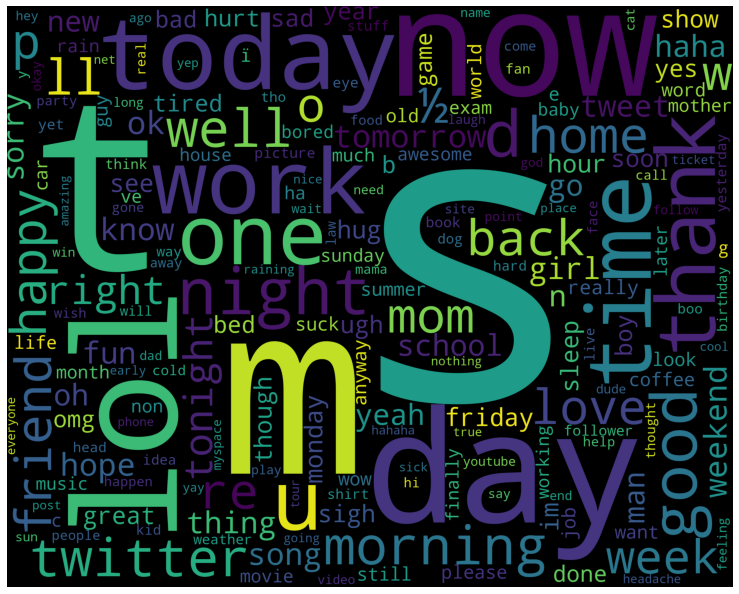

In [ ]:
wordcloud_draw(w_features)

In [ ]:
#Naive Bayes sınıflandırıcıyı eğitiyorum
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res = classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res = classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s' % (len(test_neg), neg_cnt))
print('[Positive]: %s/%s' % (len(test_pos), pos_cnt))

NameError: ignored